In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col_names=['id','ccf','age','sex','painloc','painexer','relrest','pncaden','cp','trestbps','htn','chol','smoke','cigs','years','fbs','dm','famhist','restecg','ekgmo','ekgday','ekgyr','dig','prop','nitr','pro','diuretic','proto','thaldur',
'thaltime','met','thalach','thalrest','tpeakbps','tpeakbpd','dummy','trestbpd','exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm','exerckm','restef','restwm','exeref','exerwm','thal','thalsev','thalpul',
'earlobe','cmo','cday','cyr','num','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','name']


dataset = pd.read_csv(r'data.csv', header=None, names=col_names)

In [3]:
graph2_selection=['age','sex','cp','trestbps', 'htn','chol','cigs','years','fbs','famhist','restecg','ekgmo','ekgday','ekgyr','dig','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest', 'tpeakbps', 'tpeakbpd', 'dummy','trestbpd', 'exang','xhypo','oldpeak','slope','rldv5e','ca','thal','cmo','cday','cyr','lmt', 'ladprox','laddist','cxmain','om1','rcaprox','rcadist','lvx3','lvx4','lvf']

In [4]:
X = dataset[graph2_selection].values
Y = dataset['num'].values

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-9, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = np.append(arr=np.ones((282, 1)).astype(int), values=X, axis=1)

In [9]:
import statsmodels.api as sm

def backwardElimination(x, sl): 
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
            regressor_OLS.summary()
            print(regressor_OLS.summary())
    return x

In [10]:
SL = 0.01 #significance level\n",
X_opt = X
X_Modeled = backwardElimination(X_opt, SL) 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Modeled, Y, random_state=0, 
test_size=0.2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     80.14
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.44e-119
Time:                        22:32:22   Log-Likelihood:                -59.987
No. Observations:                 282   AIC:                             214.0
Df Residuals:                     235   BIC:                             385.1
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3919      1.150     -2.950      0.0

In [11]:
from sklearn.neighbors import KNeighborsClassifier
k_nn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1, 
algorithm='ball_tree', leaf_size=30)
k_nn_classifier.fit(X_train, Y_train)
k_nn_y_pred = k_nn_classifier.predict(X_test) #predicted y values for X_train\n",
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))

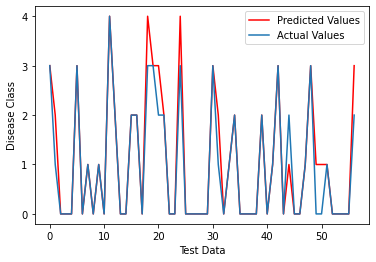

In [12]:
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(k_nn_classifier.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier;
dt = DecisionTreeClassifier(criterion='gini', splitter='best')
dt.fit(X_train, Y_train)
dt_y_pred = dt.predict(X_test)
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))

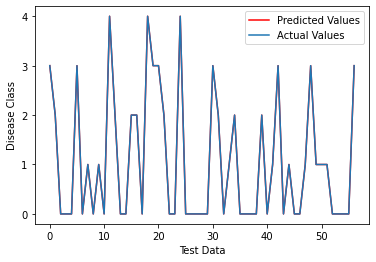

In [14]:
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(dt.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier;
rf = RandomForestClassifier(n_estimators=10, criterion='gini')
rf.fit(X_train, Y_train)
rf_y_pred = rf.predict(X_test)
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))

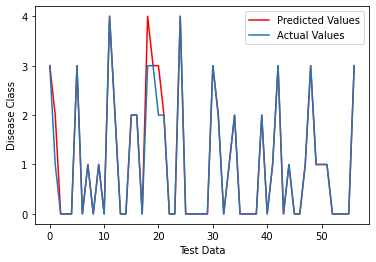

In [16]:
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(rf.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [19]:
from sklearn import metrics

k_nn_acc = metrics.accuracy_score(Y_test, k_nn_y_pred)
dt_acc = metrics.accuracy_score(Y_test, dt_y_pred)
rf_acc = metrics.accuracy_score(Y_test, rf_y_pred)

print("KNN accuracy:", k_nn_acc)
print("DT accuracy:", dt_acc)
print("RF accuracy:", rf_acc)

KNN accuracy: 0.8421052631578947
DT accuracy: 1.0
RF accuracy: 0.9473684210526315
